In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# apply the default theme
sns.set_theme()

penguins = sns.load_dataset("penguins")

# get the feature names (column names) from the dataframe
feature_names = penguins.columns[:-1]  # exclude the last column ("species")

# get the unique class names (species)
class_names = penguins["species"].unique()

# print the feature names and class names
print("feature names:", feature_names)
print("class names:", class_names)


feature names: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g'],
      dtype='object')
class names: ['Adelie' 'Chinstrap' 'Gentoo']


In [2]:
print("first few rows of the penguins dataset:")
print(penguins.head())

first few rows of the penguins dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
# check for missing values in the dataframe
missing_values = penguins.isnull()

# count missing values in each column
missing_counts = penguins.isnull().sum()


# print("\nmissing values in the penguins dataset:")
# print(missing_values)

# display the counts of missing values in each column
print("\ncounts of missing values in each column:")
print(missing_counts)


counts of missing values in each column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [4]:
# remove rows with any missing values (nan)
penguins = penguins.dropna()

# count the number of missing values after removing
print("\nnumber of missing values after removing:")
print(penguins.isnull().sum())


number of missing values after removing:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


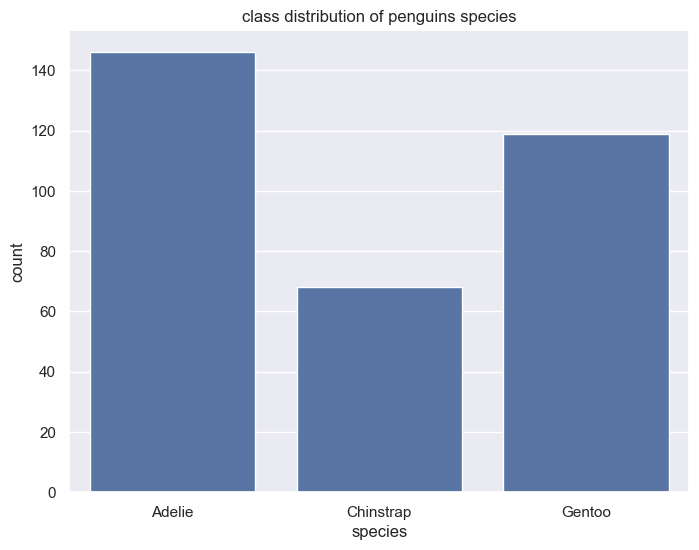

In [5]:
# plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=penguins, x="species")
plt.xlabel("species")
plt.ylabel("count")
plt.title("class distribution of penguins species")
plt.show()

In [6]:
# display information about the dataset
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None


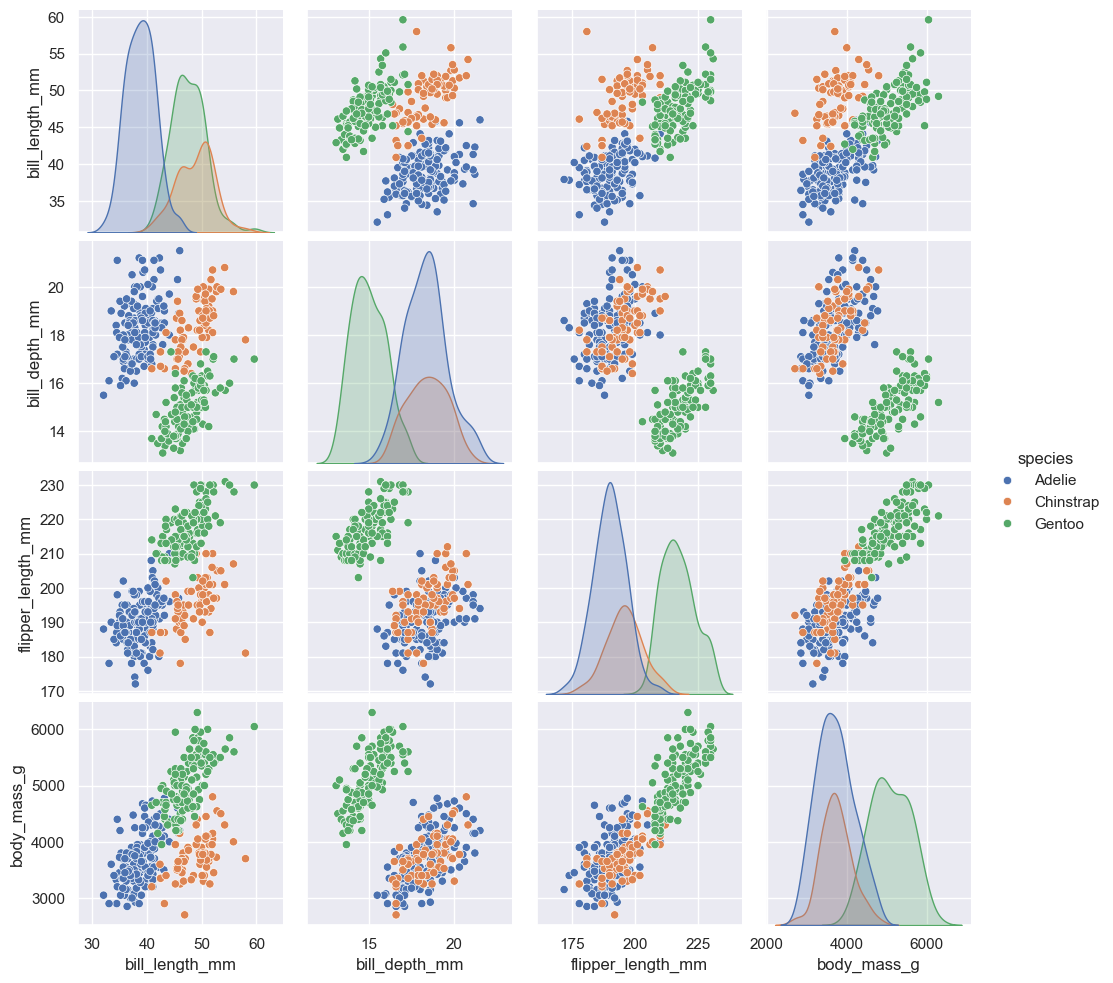

In [7]:
# calculate covariance matrix and variance for each variable

numeric_columns = penguins.select_dtypes(include=[np.number])
cov_matrix = numeric_columns.cov()
variance_values = numeric_columns.var()

# create the pairplot with covariance plots
g = sns.pairplot(data=penguins, hue="species", diag_kind="kde")


plt.show()

off-diagonal plots: each off-diagonal plot will be a scatter plot showing the relationship between pairs of variables.

diagonal plots: the diagonal plots will show the distribution of each variable. since diag_kind="kde", these plots will display smoothed density estimates (kde plots) instead of histograms. this allows you to see the distribution of each variable while considering the species differentiation provided by the colors.

In [8]:
# summary statistics for the penguins dataframe
summary_stats = penguins.describe()

# print the summary statistics
print(summary_stats)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


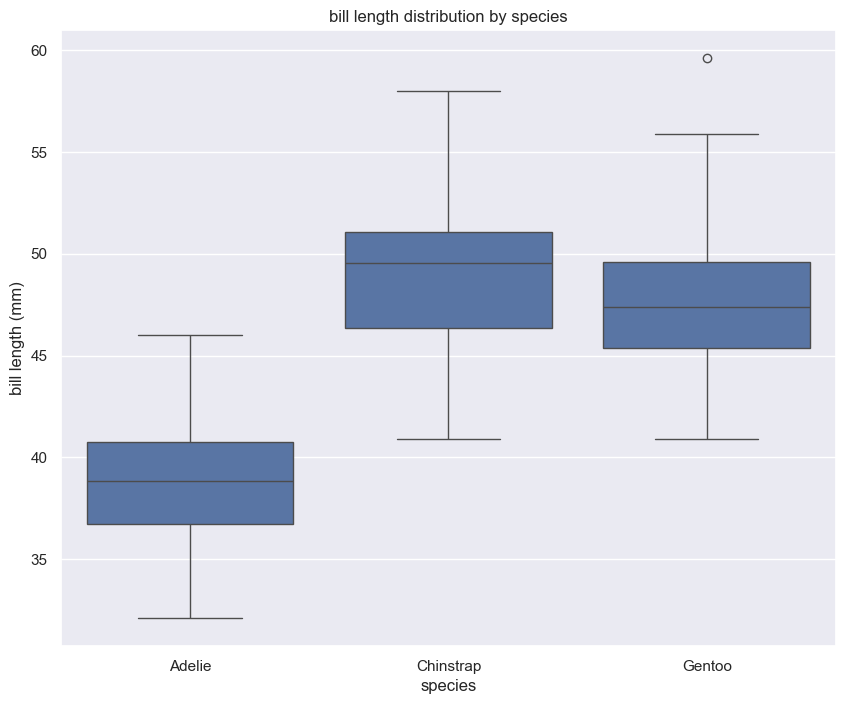

In [9]:
# create a box plot using seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x="species", y="bill_length_mm", data=penguins)
plt.title("bill length distribution by species")
plt.xlabel("species")
plt.ylabel("bill length (mm)")
plt.show()

box: the box itself represents the interquartile range (iqr), which is the range between the first quartile (q1) and the third quartile (q3). it spans the middle 50% of the data.

the whiskers extend to 1.5 times the iqr from the quartiles. data points beyond this range are considered outliers and are plotted individually

if there are no outliers beyond this range, the whiskers extend to the minimum and maximum values within this range.

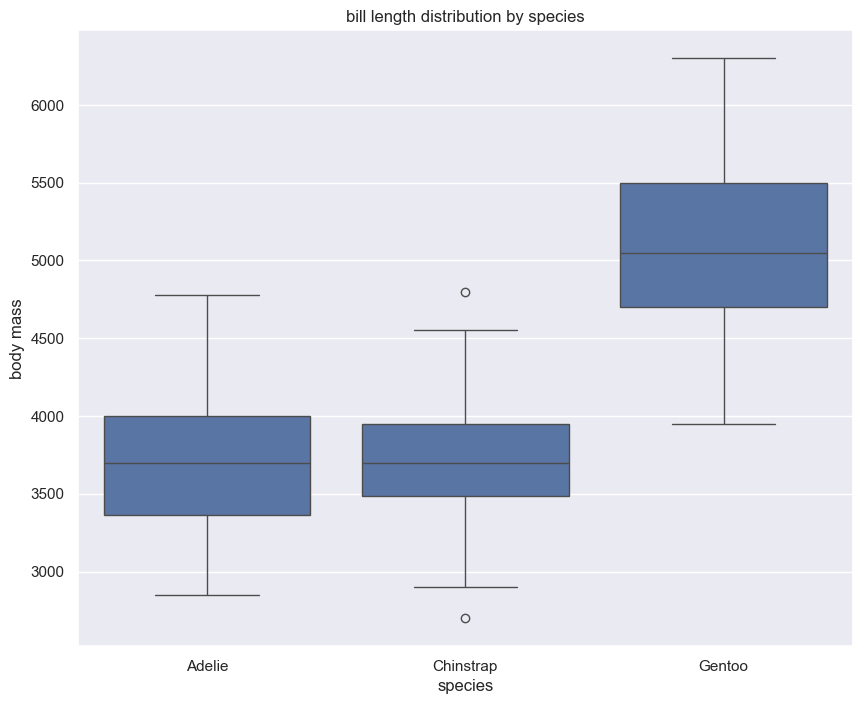

In [10]:
# create a box plot using seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x="species", y="body_mass_g", data=penguins)
plt.title("bill length distribution by species")
plt.xlabel("species")
plt.ylabel("body mass")
plt.show()

In [11]:
print("variance_values\n")
print(variance_values)
print("\n")
print("cov_matrix\n")
print(cov_matrix)

variance_values

bill_length_mm           29.906333
bill_depth_mm             3.877888
flipper_length_mm       196.441677
body_mass_g          648372.487699
dtype: float64


cov_matrix

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   

                     body_mass_g  
bill_length_mm       2595.623304  
bill_depth_mm        -748.456122  
flipper_length_mm    9852.191649  
body_mass_g        648372.487699  


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns_standardized = scaler.fit_transform(numeric_columns)

# convert the standardized array back to a dataframe with column names
numeric_columns_standardized = pd.DataFrame(
    numeric_columns_standardized, columns=numeric_columns.columns
)

# calculate covariance matrix and variance for standardized variables
cov_matrix = numeric_columns_standardized.cov()
variance_values = numeric_columns_standardized.var()

print(variance_values)
print(cov_matrix)

bill_length_mm       1.003012
bill_depth_mm        1.003012
flipper_length_mm    1.003012
body_mass_g          1.003012
dtype: float64
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.003012      -0.229314           0.655063   
bill_depth_mm           -0.229314       1.003012          -0.579532   
flipper_length_mm        0.655063      -0.579532           1.003012   
body_mass_g              0.591227      -0.473437           0.875608   

                   body_mass_g  
bill_length_mm        0.591227  
bill_depth_mm        -0.473437  
flipper_length_mm     0.875608  
body_mass_g           1.003012  
